# Предсказание направления тренда временных рядов

# Описание модели

Для решение данной задачи будем использовать скрытую марковскую модель с наблюдаемыми состояниями из нормального распределения.

В качестве наблюдаемых величин возьмем разности временного ряда с шагом 1.
Скрытым состоянием $h_i$ будет индикатор роста ряда от $o_i$ до $o_{i + 1}$. Тем самым скрытых состояний два --- $0$ и $1$. Разности нашего временного ряда вообще говоря не принадлежат одному и тому же нормальному распределению (дисперсия постоянна, а среднее меняется с углом наклона тренда). Однако это не играет важной роли, так как мы предсказываем не временной ряд и не его тренд, а направление тренда.

Таким образом, наша модель скрытой марковской цепи будет такой: скрытые величины $h_i \in \{0,\,1\}$, наблюдаемые величины $o_i \in N(\mu_{h_i}, \sigma_{h_i})$ (в баесовском подходе также задаются распределения параметров $\mu_{h_i}$ и $\sigma_{h_i}$).

Класс GaussianHMM из пакета hmmlearn позволяет подобрать параметры этих двух нормальных распределений по отрезку наблюдаемых величин (алгоритм Баума-Уельша) и предсказывать скрытые состояния по тестовому отрезку на основе этих параметров (алгоритм Витерби).

# Технические детали

Файл hmm_trading.py содержит класс HMM_trader с функциями fit, predict, score, correct_labels, set_parameter и вспомогательные функции preprocess и cv_fit_parameter, которая подбирает длину окна, которое используется в оценке предсказания. Параметры HMM-модели подбираются по всему обучающему отрезку.

Файл classification_quality.py содержит функции связанные с тестированием HMM_trader, запуск тестирования с параметрами производится через функцию process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 9, 5

In [5]:
import classification_quality

# Тестирование тренда без шума

In [3]:
seed = classification_quality.get_seed(1)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 0
Window length = 15


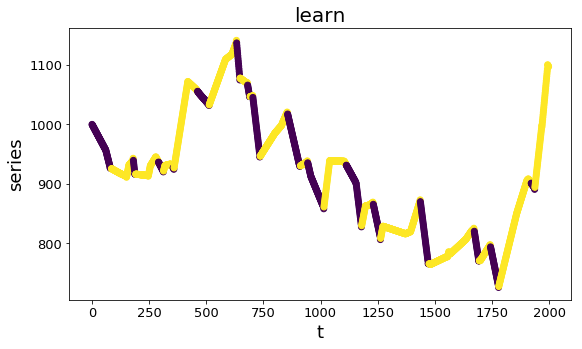

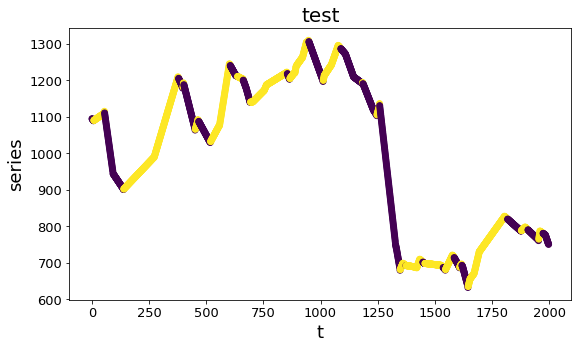

RESULTS:
Mean learn accuracy = 0.7704
Mean test accuracy = 0.8539
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [27]:
result = classification_quality.process(1, 0, 2, 30, 0, seed = seed, plot = True)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 0
Window length = 15
Fitted window length = 25


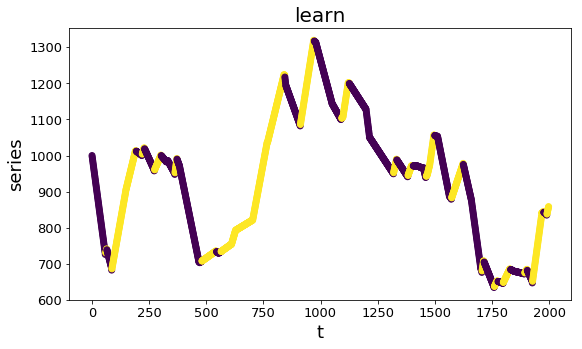

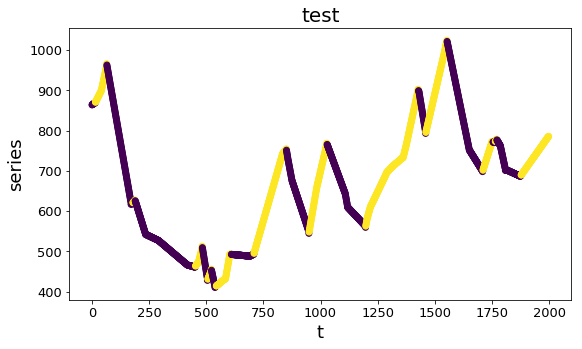

RESULTS:
Mean learn accuracy = 0.9415
Mean test accuracy = 0.9525
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [5]:
result = classification_quality.process(1, 0, 2, 30, 0, seed = seed, plot = True, fit_parameter = True)

In [6]:
result = classification_quality.process(20, 0, 2, 30, 0, window_len = result[2])

SERIES PARAMETERS:
N folds = 20
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 0
Window length = 25
RESULTS:
Mean learn accuracy = 0.8892
Mean test accuracy = 0.8702
SD learn accuracy = 0.0679
SD test accuracy = 0.0804


# Тестирование броуновского движения

In [7]:
seed = classification_quality.get_seed(1)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 0
Lambda = 30
Noise variance = 3
Window length = 15


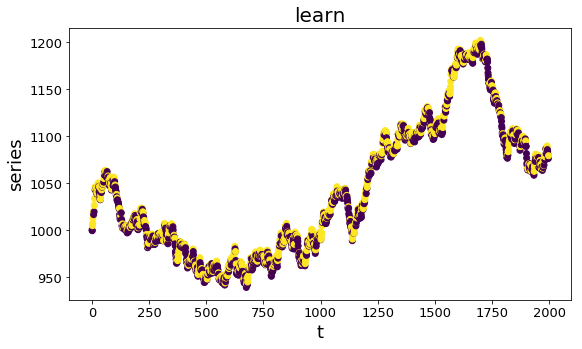

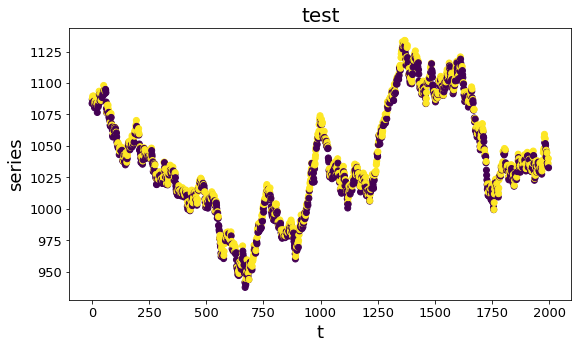

RESULTS:
Mean learn accuracy = 0.4927
Mean test accuracy = 0.5053
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [8]:
result = classification_quality.process(1, 0, 0, 30, 3, seed = seed, plot = True)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 0
Lambda = 30
Noise variance = 3
Window length = 15
Fitted window length = 45


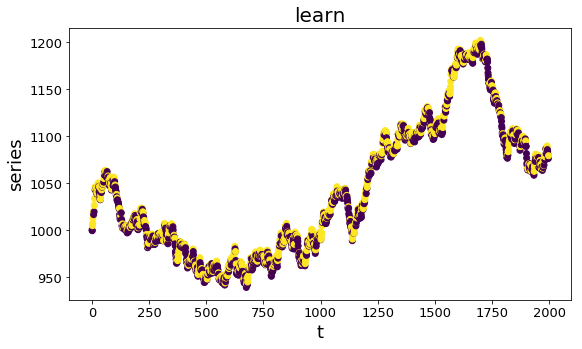

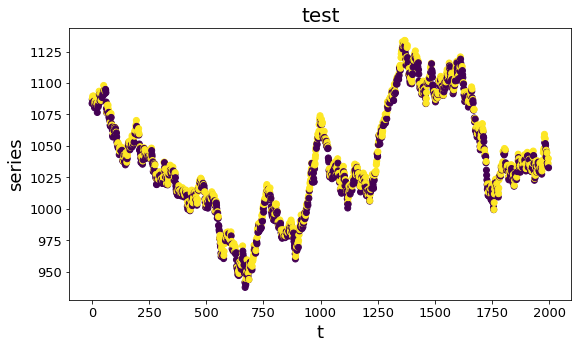

RESULTS:
Mean learn accuracy = 0.4927
Mean test accuracy = 0.5053
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [9]:
result = classification_quality.process(1, 0, 0, 30, 3, seed = seed, plot = True, fit_parameter = True)

In [10]:
result = classification_quality.process(20, 0, 0, 10, 1, window_len = result[2])

SERIES PARAMETERS:
N folds = 20
Mean tangent = 0
Tangent variance = 0
Lambda = 10
Noise variance = 1
Window length = 45
RESULTS:
Mean learn accuracy = 0.4995
Mean test accuracy = 0.5001
SD learn accuracy = 0.0086
SD test accuracy = 0.0118


# Тестирование других рядов

## Шум с малой дисперсией

In [11]:
seed = classification_quality.get_seed(1)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 0.001
Window length = 15


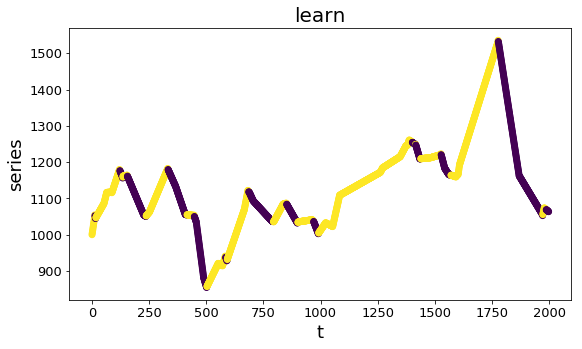

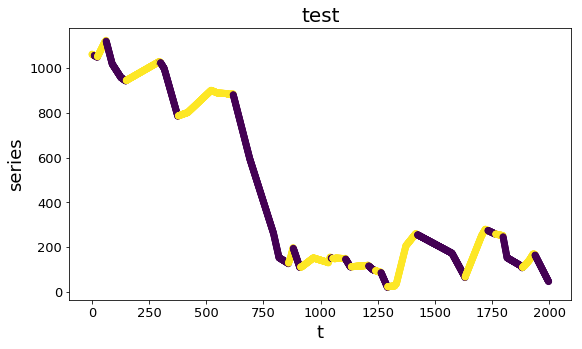

RESULTS:
Mean learn accuracy = 0.9120
Mean test accuracy = 0.8364
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [12]:
result = classification_quality.process(1, 0, 2, 30, 0.001, seed = seed, plot = True)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 0.001
Window length = 15
Fitted window length = 15


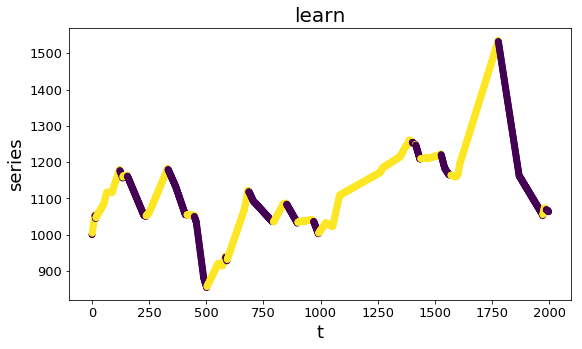

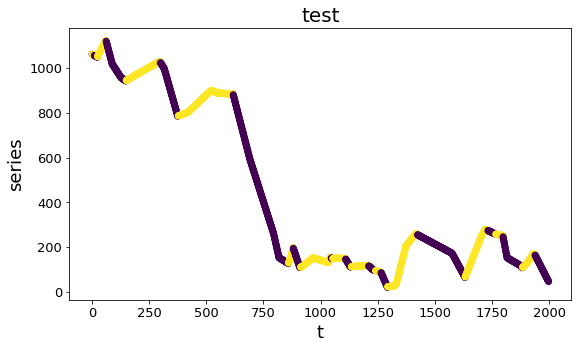

RESULTS:
Mean learn accuracy = 0.9115
Mean test accuracy = 0.8369
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [13]:
result = classification_quality.process(1, 0, 2, 30, 0.001, seed = seed, plot = True, fit_parameter = True)

In [14]:
result = classification_quality.process(20, 0, 2, 30, 0.001, window_len = result[2])

SERIES PARAMETERS:
N folds = 20
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 0.001
Window length = 15
RESULTS:
Mean learn accuracy = 0.8836
Mean test accuracy = 0.8643
SD learn accuracy = 0.0583
SD test accuracy = 0.0891


## Тренд c малой дисперсией тангенса наклона

In [15]:
seed = classification_quality.get_seed(1)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 0.001
Lambda = 30
Noise variance = 2
Window length = 15


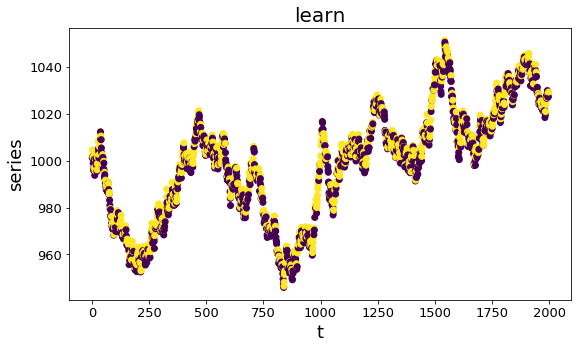

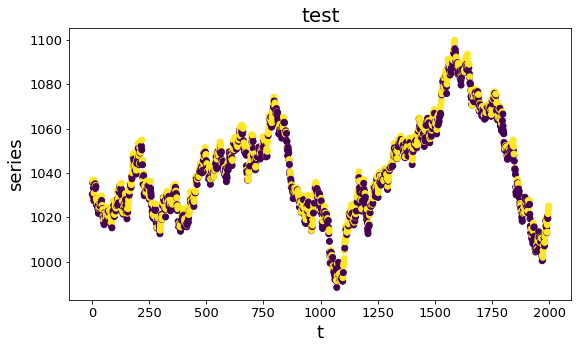

RESULTS:
Mean learn accuracy = 0.4997
Mean test accuracy = 0.5023
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [16]:
result = classification_quality.process(1, 0, 0.001, 30, 2, seed = seed, plot = True)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 0.001
Lambda = 30
Noise variance = 2
Window length = 15
Fitted window length = 35


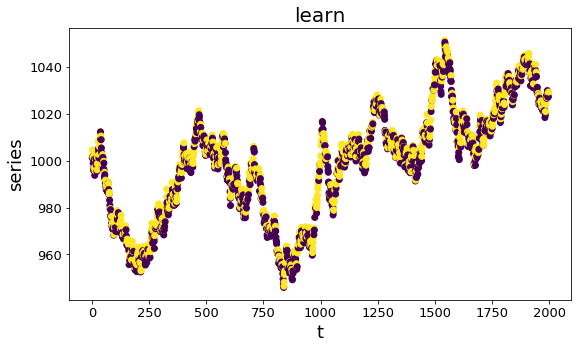

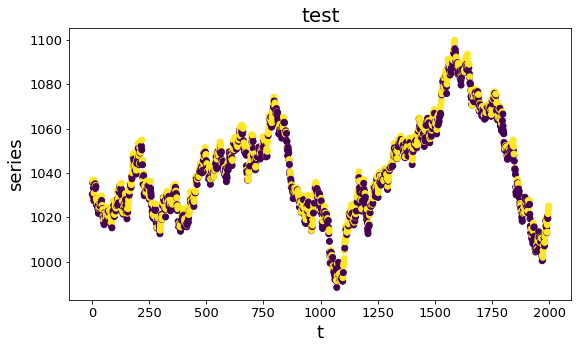

RESULTS:
Mean learn accuracy = 0.4997
Mean test accuracy = 0.5023
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [17]:
result = classification_quality.process(1, 0, 0.001, 30, 2, seed = seed, plot = True, fit_parameter = True)

In [18]:
result = classification_quality.process(20, 0, 0.001, 30, 2, window_len = result[2])

SERIES PARAMETERS:
N folds = 20
Mean tangent = 0
Tangent variance = 0.001
Lambda = 30
Noise variance = 2
Window length = 35
RESULTS:
Mean learn accuracy = 0.4998
Mean test accuracy = 0.4984
SD learn accuracy = 0.0107
SD test accuracy = 0.0105


## Шум с ненулевой дисперсией и тренд с ненулевой дисперсией тангенса наклона

In [19]:
seed = classification_quality.get_seed(1)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 2
Window length = 15


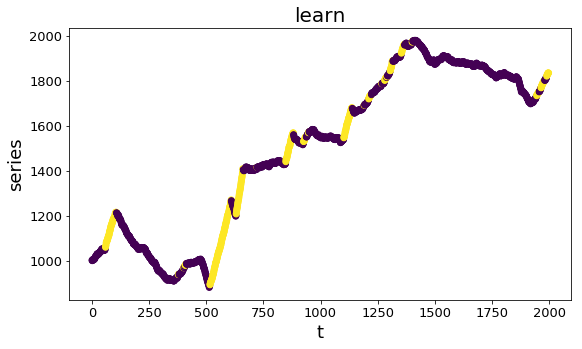

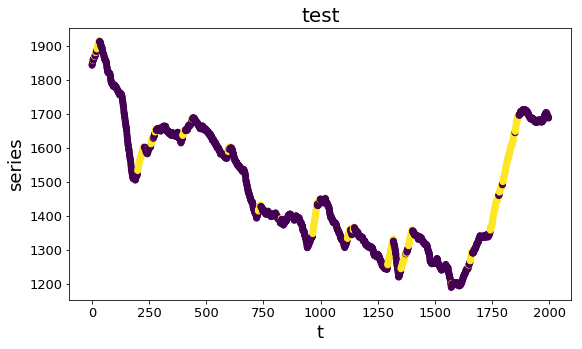

RESULTS:
Mean learn accuracy = 0.5983
Mean test accuracy = 0.6368
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [20]:
result = classification_quality.process(1, 0, 2, 30, 2, seed = seed, plot = True)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 2
Window length = 15
Fitted window length = 40


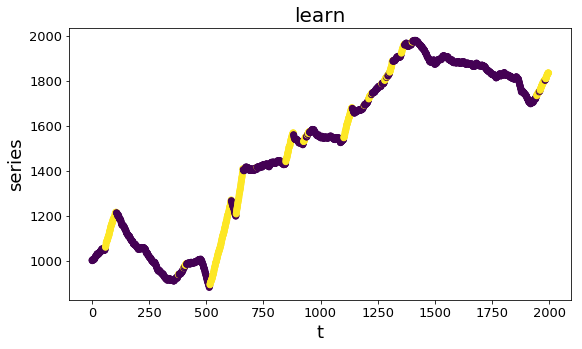

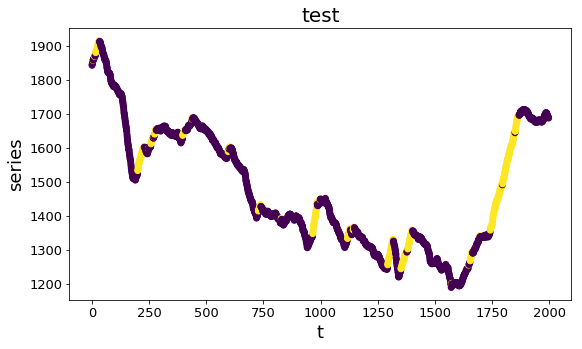

RESULTS:
Mean learn accuracy = 0.6043
Mean test accuracy = 0.6423
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [21]:
result = classification_quality.process(1, 0, 2, 30, 2, seed = seed, plot = True, fit_parameter = True)

In [22]:
result = classification_quality.process(20, 0, 2, 30, 2, window_len = result[2])

SERIES PARAMETERS:
N folds = 20
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 2
Window length = 40
RESULTS:
Mean learn accuracy = 0.7194
Mean test accuracy = 0.7121
SD learn accuracy = 0.0262
SD test accuracy = 0.0303


In [23]:
seed = classification_quality.get_seed(1)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 20
Window length = 15


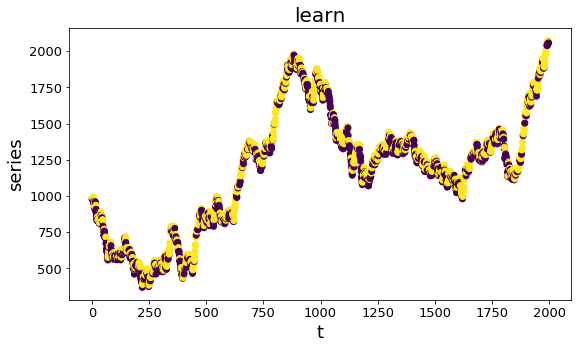

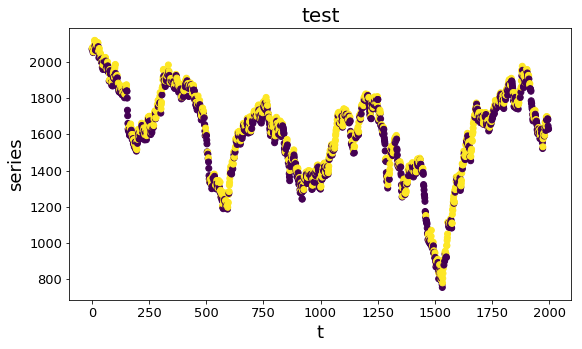

RESULTS:
Mean learn accuracy = 0.5193
Mean test accuracy = 0.5078
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [24]:
result = classification_quality.process(1, 0, 2, 30, 20, seed = seed, plot = True)

SERIES PARAMETERS:
N folds = 1
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 20
Window length = 15
Fitted window length = 5


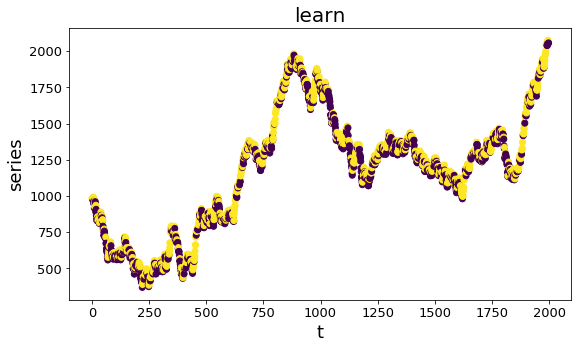

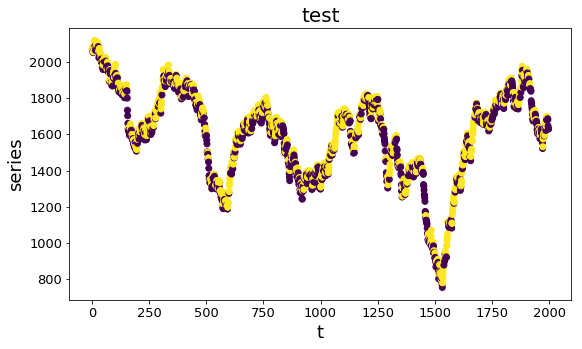

RESULTS:
Mean learn accuracy = 0.5198
Mean test accuracy = 0.5088
SD learn accuracy = 0.0000
SD test accuracy = 0.0000


In [25]:
result = classification_quality.process(1, 0, 2, 30, 20, seed = seed, plot = True, fit_parameter = True)

In [26]:
result = classification_quality.process(20, 0, 2, 30, 20, window_len = result[2])

SERIES PARAMETERS:
N folds = 20
Mean tangent = 0
Tangent variance = 2
Lambda = 30
Noise variance = 20
Window length = 5
RESULTS:
Mean learn accuracy = 0.5018
Mean test accuracy = 0.4983
SD learn accuracy = 0.0153
SD test accuracy = 0.0095
